<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preamble" data-toc-modified-id="Preamble-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Preamble</a></span><ul class="toc-item"><li><span><a href="#Some-general-paramaters" data-toc-modified-id="Some-general-paramaters-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Some general paramaters</a></span></li></ul></li><li><span><a href="#Calculating-the-persistence-time-scaling-with-B" data-toc-modified-id="Calculating-the-persistence-time-scaling-with-B-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Calculating the persistence time scaling with B</a></span><ul class="toc-item"><li><span><a href="#An-example" data-toc-modified-id="An-example-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>An example</a></span></li><li><span><a href="#Variable-time" data-toc-modified-id="Variable-time-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Variable time</a></span></li><li><span><a href="#Systematic" data-toc-modified-id="Systematic-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Systematic</a></span></li><li><span><a href="#Noise-calculations-(current)" data-toc-modified-id="Noise-calculations-(current)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Noise calculations (current)</a></span></li><li><span><a href="#Noise-calculations-(weights)" data-toc-modified-id="Noise-calculations-(weights)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Noise calculations (weights)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Systematica-calculations" data-toc-modified-id="Systematica-calculations-1.5.0.1"><span class="toc-item-num">1.5.0.1&nbsp;&nbsp;</span>Systematica calculations</a></span></li></ul></li></ul></li><li><span><a href="#Storage-of-the-plot" data-toc-modified-id="Storage-of-the-plot-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Storage of the plot</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#With-precision" data-toc-modified-id="With-precision-1.6.0.1"><span class="toc-item-num">1.6.0.1&nbsp;&nbsp;</span>With precision</a></span></li><li><span><a href="#No-precision" data-toc-modified-id="No-precision-1.6.0.2"><span class="toc-item-num">1.6.0.2&nbsp;&nbsp;</span>No precision</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Preamble

In [1]:
import  pprint
import  subprocess 
import sys 
sys.path.append('../')

import numpy as np
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 10)

np.set_printoptions(suppress=True, precision=5)

sns.set_style("whitegrid", {'axes.grid': False})

from network import Protocol, NetworkManager, Network
from patterns_representation import PatternsRepresentation
from analysis_functions import calculate_persistence_time, calculate_recall_quantities
from plotting_functions import plot_weight_matrix, plot_network_activity_angle, plot_persistent_matrix

## Some general paramaters

In [2]:
epsilon = 10e-80
vmin = -3.0
remove = 0.005
dt = 0.001

In [3]:
lw = 8
ms = 15
alpha_graph = 0.3
colors = sns.color_palette()
sns.set(font_scale=2.5)
sns.set_context(rc={"lines.linewidth": lw})
sns.set_style("whitegrid", {'axes.grid': False})

# Calculating the persistence time scaling with B

## An example

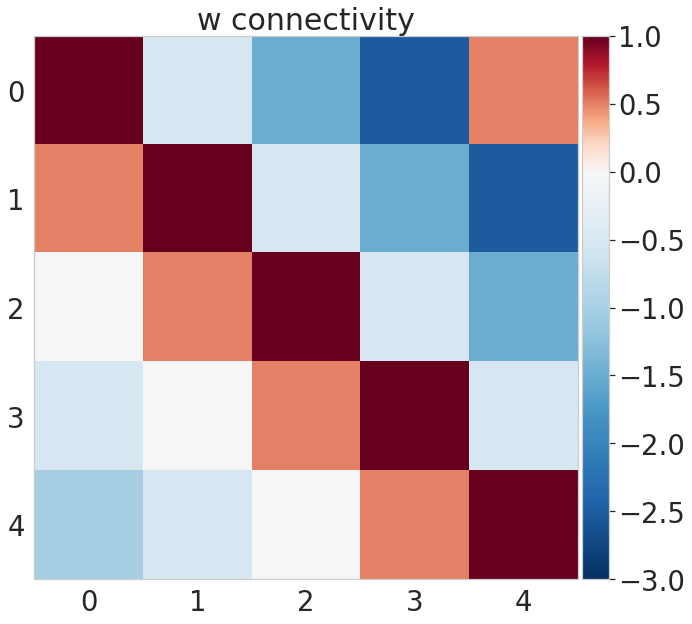

In [4]:
strict_maximum = True

g_a = 1.0
g_I = 2.0
tau_a = 0.250
G = 1.0
sigma_out = 0.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.005

hypercolumns = 1
minicolumns = 5
n_patterns = 5

# Training protocol
ws = 1.0
wn = 0.5
wb = -0.5
alpha = 0.5
alpha_back = 1.0


T_persistence = 0.100

# Manager properties
dt = 0.0001
values_to_save = ['o']


# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
             tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
             strict_maximum=strict_maximum, perfect=False, normalized_currents=True)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

manager.run_artificial_protocol(ws=ws, wn=wn, wb=wb, alpha=alpha, alpha_back=alpha_back, cycle=False)
nn.w[0, minicolumns - 1] = wn
plot_weight_matrix(manager, one_hypercolum=False, vmin=vmin)

In [5]:
T_saved = 2.4

In [6]:
T_persistence1 = 0.100
manager.set_persistent_time_with_adaptation_gain(T_persistence=T_persistence1)
T_cue = tau_s
T_recall = T_saved + tau_s
I_cue = 0
nr = manager.canonical_network_representation
aux = calculate_recall_quantities(manager, nr, T_recall, T_cue, remove=remove, reset=True, empty_history=True)
success, pattern_sequence, persistent_times, timings = aux

cmap = matplotlib.cm.binary
o1 = manager.history['o']

In [7]:
T_persistence2 = 0.500
manager.set_persistent_time_with_adaptation_gain(T_persistence=T_persistence2)
T_cue = tau_s
T_recall = T_saved + tau_s
I_cue = 0
nr = manager.canonical_network_representation
aux = calculate_recall_quantities(manager, nr, T_recall, T_cue, remove=remove, reset=True, empty_history=True)
success, pattern_sequence, persistent_times, timings = aux

cmap = matplotlib.cm.binary
o2 = manager.history['o']

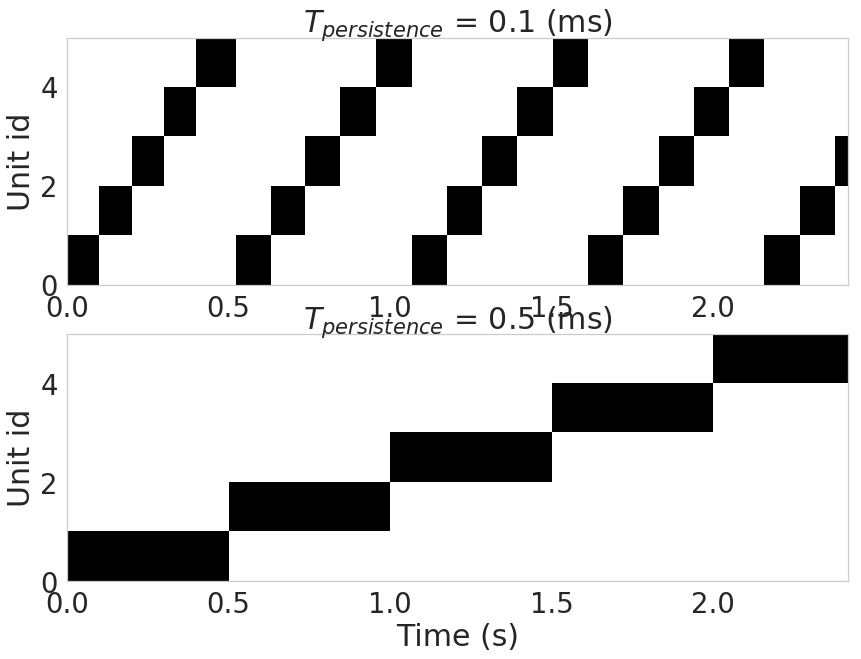

In [8]:
fig = plt.figure()
ax = fig.add_subplot(211)
extent = [0, manager.T_recall_total, 0, minicolumns]
ax.imshow(o1.T, cmap=cmap, origin='lower', aspect='auto', extent=extent)

ax.set_ylabel('Unit id')
ax.set_title(r'$T_{persistence}$ = ' + str(T_persistence1) + ' (ms)')

ax = fig.add_subplot(212)
extent = [0, manager.T_recall_total, 0, minicolumns]
ax.imshow(o2.T, cmap=cmap, origin='lower', aspect='auto', extent=extent)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Unit id')
ax.set_title(r'$T_{persistence}$ = ' + str(T_persistence2) + ' (ms)');

## Variable time

In [9]:
sigma_out = 0.00
tau_z_pre = 0.100
tau_z_post = 0.005

hypercolumns = 1
minicolumns = 5
n_patterns = minicolumns


# Training protocol
training_times_base = 0.100
training_times = [0.500, 0.200, 1.2, 0.100, 0.400]
ipi_base = 0.0
inter_pulse_intervals = [ipi_base for i in range(n_patterns)]
inter_sequence_interval = 1.0
resting_time = 0.0
epochs = 1
T_persistence = 0.100

# Manager properties
values_to_save = ['o']


# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
                 tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
                 strict_maximum=strict_maximum, perfect=False, normalized_currents=True)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the representation
representation = PatternsRepresentation(manager.canonical_activity_representation, minicolumns=minicolumns)


# Build the protocol
protocol = Protocol()
protocol.simple_protocol(representation, training_times=training_times, inter_pulse_intervals=inter_pulse_intervals,
                    inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

# Run the protocol
timed_input = manager.run_network_protocol_offline(protocol=protocol)

o3 = timed_input.O

## Systematic

In [10]:
strict_maximum = True

g_a = 1.0
g_I = 2.0
tau_a = 0.250
G = 1.0
sigma_out = 0.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.005

hypercolumns = 1
minicolumns = 5
n_patterns = 10

# Training protocol
ws = 1.0
wn = 0.5
wb = -0.5
alpha = 0.5
alpha_back = 1.0


T_persistence = 0.100

# Manager properties
dt = 0.001
values_to_save = ['o']


# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
             tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
             strict_maximum=strict_maximum, perfect=False, normalized_currents=True)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

manager.run_artificial_protocol(ws=ws, wn=wn, wb=wb, alpha=alpha, alpha_back=alpha_back, cycle=False);

In [11]:
T_persistence = 0.100
manager.set_persistent_time_with_adaptation_gain(T_persistence=T_persistence)
T_cue = tau_s
T_recall = minicolumns * T_persistence + tau_s
I_cue = 0
nr = manager.canonical_network_representation
aux = calculate_recall_quantities(manager, nr, T_recall, T_cue, remove=remove, reset=True, empty_history=True)
success, pattern_sequence, persistent_times, timings = aux

In [12]:
%%time
num = 20

B = np.linspace(0.001, 0.90, num=int(0.60 * num))
r = tau_s / tau_a
T_per_set1 = tau_a * np.log(1 / (1 - B)) + tau_a * np.log(1 / (1 - r))

T_per_set2 = np.linspace(0.8, 3.0, num=int(0.40 * num))

T_per_set = np.concatenate((T_per_set1, T_per_set2))

T_sim = np.zeros(num)
B_sim = np.zeros(num)
T_cue = tau_s
I_cue = 0
nr = manager.canonical_network_representation


for index, T_per in enumerate(T_per_set):
    manager.set_persistent_time_with_adaptation_gain(T_persistence=T_per)
    T_recall = T_per * minicolumns + tau_s
    aux = calculate_recall_quantities(manager, nr, T_recall, T_cue, remove=remove, reset=True, empty_history=True)
    success, pattern_sequence, persistent_times, timings = aux    
    T_sim[index] = np.mean(persistent_times[1:-1])
    aux = manager.nn.w[1, 1] - manager.nn.w[2, 1] + manager.nn.beta[1] - manager.nn.beta[2]
    B_sim[index] = aux / manager.nn.g_a

CPU times: user 6.31 s, sys: 16 ms, total: 6.33 s
Wall time: 6.19 s


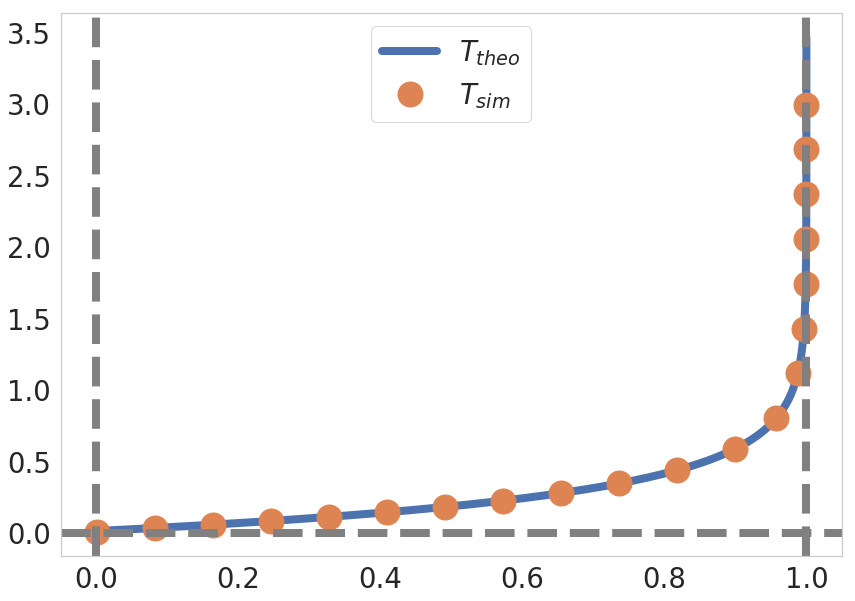

In [13]:
B_theo = 1 - np.logspace(0, -6, num=500)
r = tau_s / tau_a
T = tau_a * np.log(1 / (1 - B_theo)) + tau_a * np.log(1 / (1 - r))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(B_theo, T, lw=lw, label=r'$T_{theo}$');
ax.plot(B_sim, T_sim, 'o', ms=ms + 10, label=r'$T_{sim}$')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.axvline(1, ls='--', color='gray')

ax.legend();

In [14]:
manager.set_persistent_time_with_adaptation_gain(0.100)
manager.calculate_persistence_time_matrix()
B1 = manager.B[3, 2]
manager.set_persistent_time_with_adaptation_gain(0.500)
manager.calculate_persistence_time_matrix()
B2 = manager.B[3, 2]

../network.py:506: RuntimeWarning: invalid value encountered in log
  self.T = self.nn.tau_a * np.log(1 / (1 - self.B))
../network.py:510: RuntimeWarning: invalid value encountered in less
  self.T[self.T < 0] = 0.0


## Noise calculations (current)

In [15]:
%%time
sigma_out_trajectories = 0.1
manager.nn.sigma_in = sigma_out_trajectories * np.sqrt(2 / tau_s)

T_per_matrix = {T_per:[] for T_per in T_per_set}
sequences = {T_per:[] for T_per in T_per_set}

manager.nn.sigma_out = 0.1
trials = 5

for index, T_per in enumerate(T_per_set):
    print('T_per', T_per)
    manager.set_persistent_time_with_adaptation_gain(T_persistence=T_per)
    T_recall = T_per * minicolumns + tau_s
    for index in range(trials):
        aux = calculate_recall_quantities(manager, nr, T_recall, T_cue, remove=remove, reset=True, empty_history=True)
        success, pattern_sequence, persistent_times, timings = aux    
        T_per_matrix[T_per] += persistent_times[1:-1]
        sequences[T_per].append(pattern_sequence) 

T_per 0.010455623713459705
T_per 0.03179310823827704
T_per 0.05512313073566333
T_per 0.08085651818627312
T_per 0.1095459151859157
T_per 0.14195964840949293
T_per 0.17921098138868435
T_per 0.2230015461982076
T_per 0.2761264965172402
T_per 0.34367410585503383
T_per 0.4365175529500908
T_per 0.5858517718785753
T_per 0.8
T_per 1.1142857142857143
T_per 1.4285714285714288
T_per 1.742857142857143
T_per 2.0571428571428574
T_per 2.371428571428572
T_per 2.685714285714286
T_per 3.0
CPU times: user 31 s, sys: 24 ms, total: 31 s
Wall time: 31.1 s


In [16]:
num = [len(T_per_matrix[T_per]) for T_per in T_per_set]
means = [np.mean(T_per_matrix[T_per]) for T_per in T_per_set]
std = [np.std(T_per_matrix[T_per]) for T_per in T_per_set]

In [17]:
T_per_set

array([0.01046, 0.03179, 0.05512, 0.08086, 0.10955, 0.14196, 0.17921,
       0.223  , 0.27613, 0.34367, 0.43652, 0.58585, 0.8    , 1.11429,
       1.42857, 1.74286, 2.05714, 2.37143, 2.68571, 3.     ])

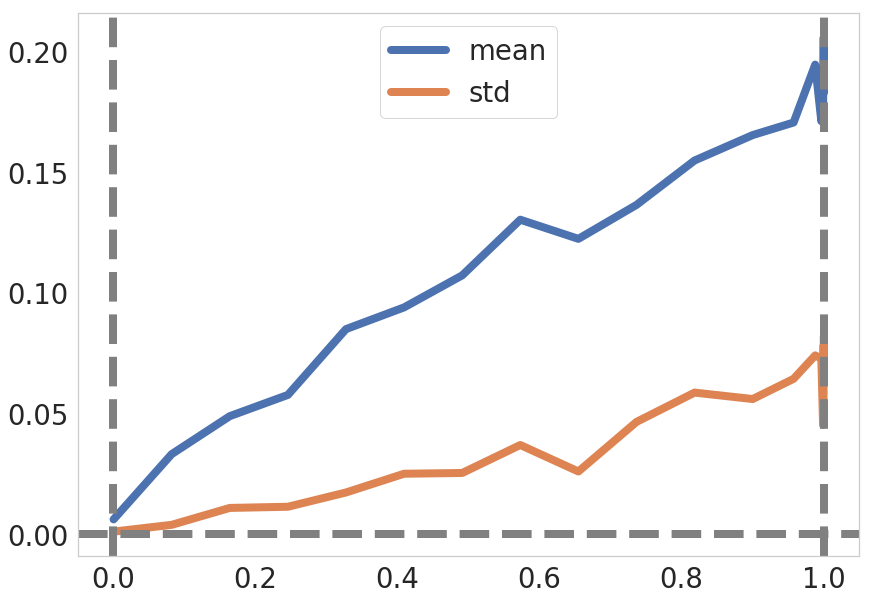

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)


ax.plot(B_sim, means, lw=lw, label='mean')
ax.plot(B_sim, std, lw=lw, label='std')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.axvline(1, ls='--', color='gray')

ax.legend();

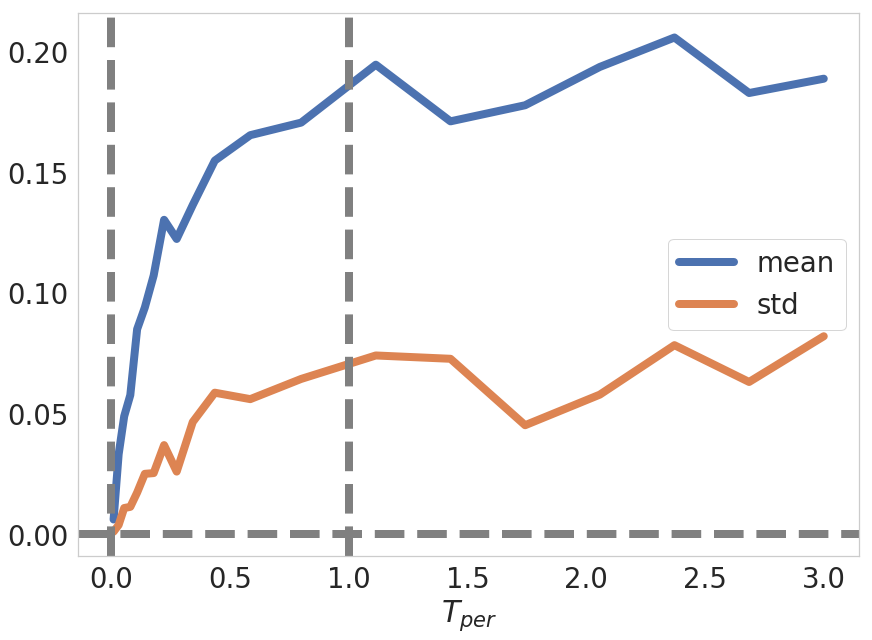

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(T_per_set, means, lw=lw, label='mean')
ax.plot(T_per_set, std, lw=lw, label='std')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.axvline(1, ls='--', color='gray')

ax.set_xlabel(r'$T_{per}$')

ax.legend();

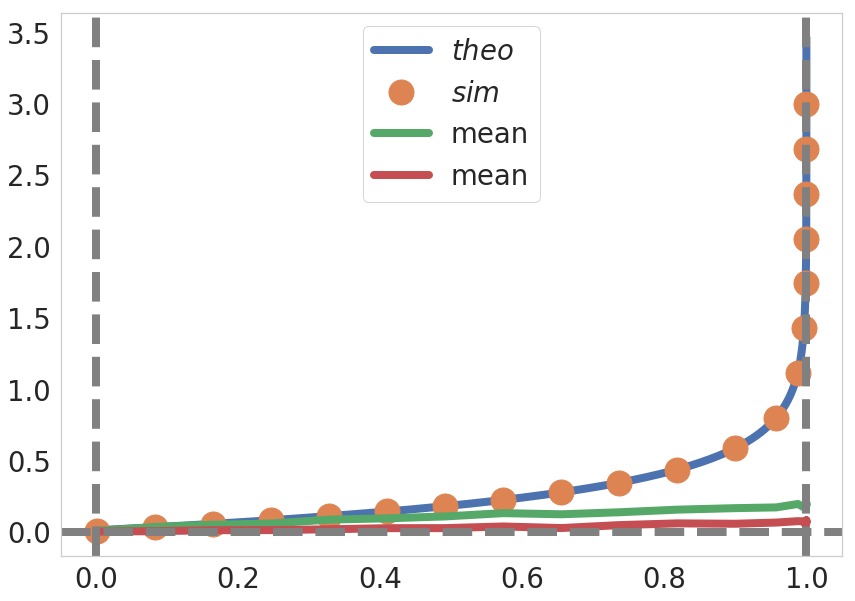

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(B_theo, T, lw=lw, label=r'$theo$');
ax.plot(B_sim, T_sim, 'o', ms=ms + 10, label=r'$sim$')
ax.plot(B_sim, means, lw=lw, label='mean')
ax.plot(B_sim, std, lw=lw, label='mean')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.axvline(1, ls='--', color='gray')

ax.legend();

## Noise calculations (weights)

In [21]:
B_set_for_noise = np.linspace(0.01, 0.9, num=10)
g_a_set =  (ws - wn) / B_set_for_noise
print('g_a', g_a_set)
print('w diff', ws - wn)

g_a [50.       4.59184  2.40642  1.63043  1.23288  0.99119  0.82873  0.71203
  0.62413  0.55556]
w diff 0.5


In [22]:
sigma_w = 0.1
samples_w = 1000
ws_samples = np.random.normal(ws, scale=sigma_w, size=samples_w)
wn_samples = np.random.normal(wn, scale=sigma_w, size=samples_w)
w_diff_samples = ws_samples - wn_samples

(array([  9.,  38., 117., 183., 229., 203., 116.,  71.,  27.,   7.]),
 array([0.21639, 0.27677, 0.33714, 0.39752, 0.45789, 0.51827, 0.57864,
        0.63902, 0.69939, 0.75977, 0.82014]),
 <a list of 10 Patch objects>)

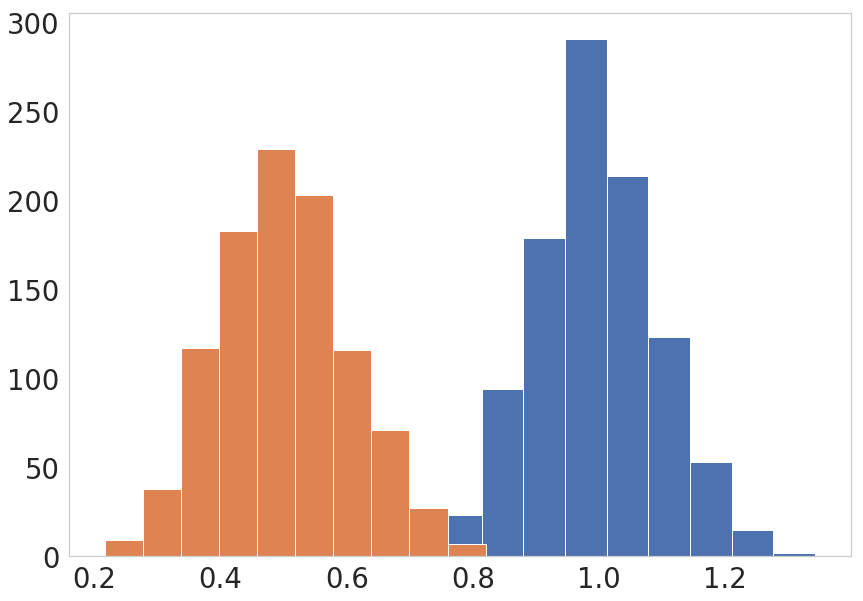

In [23]:
plt.hist(ws_samples)
plt.hist(wn_samples)

Text(0.5,0,'w_diff')

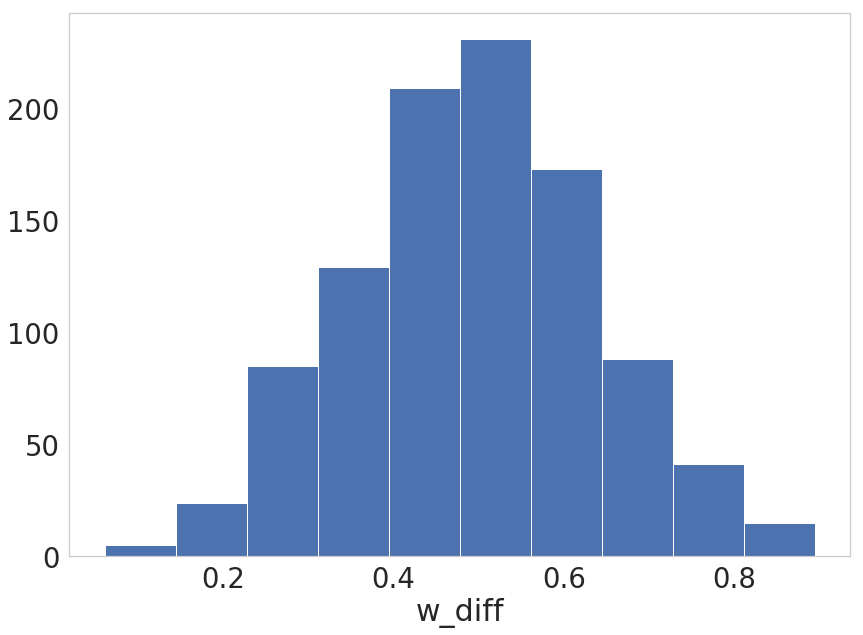

In [24]:
plt.hist(w_diff_samples)
plt.xlabel('w_diff')

In [25]:
g_a_aux = 0.6
B_samples = w_diff_samples / g_a_aux
index_up = B_samples >= 1.0
index_down = B_samples <= 0.0
index_good = np.logical_and(np.logical_not(index_up), np.logical_not(index_down))
fail_up  = np.sum(index_up)
fail_down = np.sum(index_down)
print('fail up', fail_up / samples_w)
print('fail down', fail_down / samples_w)

fail up 0.223
fail down 0.0


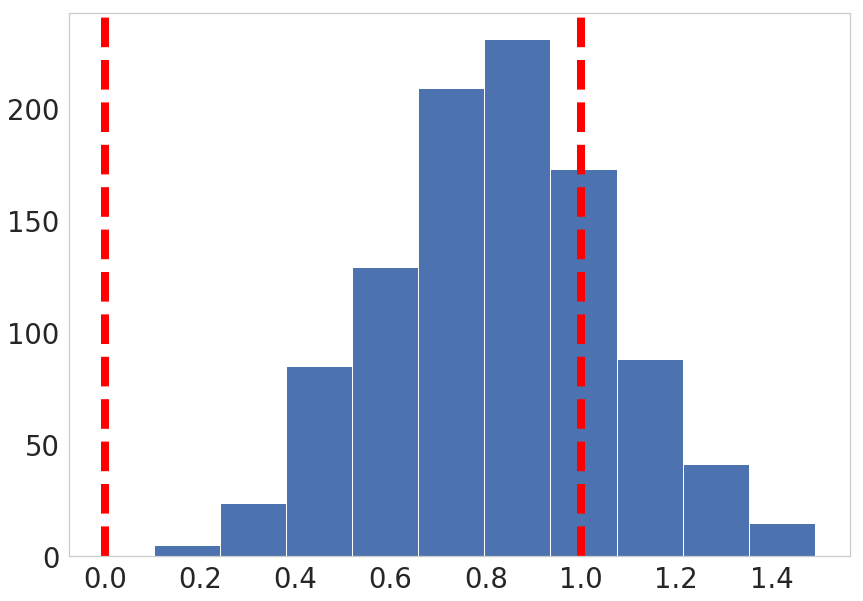

In [26]:
plt.hist(B_samples)
plt.axvline(0, ls='--', color='red')
plt.axvline(1, ls='--', color='red')

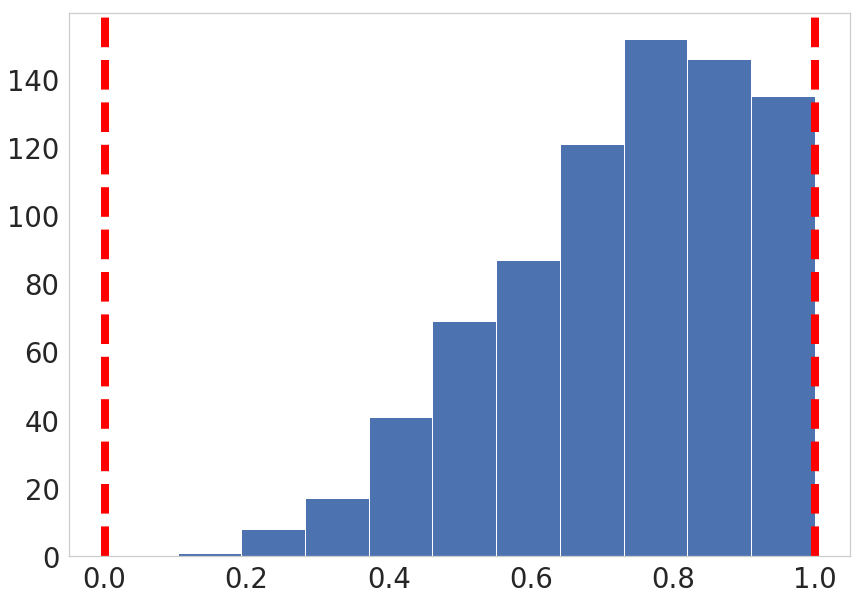

In [27]:
w_clean_samples = w_diff_samples[index_good]
plt.hist(w_clean_samples / g_a_aux)
plt.axvline(0, ls='--', color='red')
plt.axvline(1, ls='--', color='red')

Text(0.5,0,'$T_{per}$')

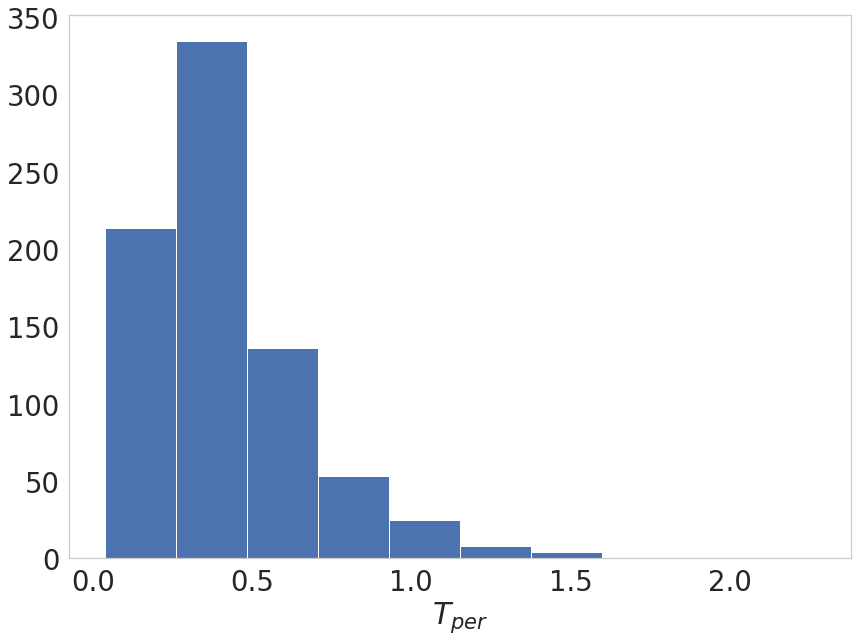

In [28]:
w_clean_samples = w_diff_samples[index_good]
T_per_samples = calculate_persistence_time(tau_a, w_clean_samples, 0, g_a_aux , tau_s, perfect=False)
plt.hist(T_per_samples)
plt.xlabel(r'$T_{per}$')

#### Systematica calculations

In [29]:
%%time

B_for_samples = 1 - np.logspace(0, -4, num=100)[1:]
print('B set', B_for_samples)
means_T = []
T_theo_sampled = []
std_T = []
fail_up_set = []
fail_down_set = []
sigma_w = 0.1 * (ws - wn)
samples_w = 1000
g_a_set =  (ws - wn) / B_for_samples

for g_a_aux in g_a_set:
    ws_samples = np.random.normal(ws, scale=sigma_w, size=samples_w)
    wn_samples = np.random.normal(wn, scale=sigma_w, size=samples_w)
    w_diff_samples = ws_samples - wn_samples

    B_samples = w_diff_samples / g_a_aux
    index_up = B_samples >= 1.0
    index_down = B_samples <= 0.0
    index_good = np.logical_and(np.logical_not(index_up), np.logical_not(index_down))
    fail_up  = np.sum(index_up) / samples_w
    fail_down = np.sum(index_down) / samples_w

    w_clean_samples = w_diff_samples[index_good]
    T_per_samples = calculate_persistence_time(tau_a, w_clean_samples, 0, g_a_aux , tau_s, perfect=False)
    T_theo_sampled.append(calculate_persistence_time(tau_a, (ws - wn), 0, g_a_aux , tau_s, perfect=False))
    # Store
    means_T.append(np.mean(T_per_samples))
    std_T.append(np.std(T_per_samples))
    fail_up_set.append(fail_up)
    fail_down_set.append(fail_down)

B set [0.08884 0.16978 0.24354 0.31074 0.37197 0.42776 0.4786  0.52492 0.56712
 0.60558 0.64062 0.67255 0.70164 0.72814 0.75229 0.7743  0.79435 0.81262
 0.82926 0.84443 0.85825 0.87085 0.88232 0.89277 0.9023  0.91098 0.91889
 0.92609 0.93266 0.93864 0.94409 0.94906 0.95358 0.95771 0.96146 0.96489
 0.96801 0.97085 0.97344 0.9758  0.97795 0.97991 0.98169 0.98332 0.9848
 0.98615 0.98738 0.9885  0.98952 0.99045 0.9913  0.99208 0.99278 0.99342
 0.99401 0.99454 0.99502 0.99547 0.99587 0.99624 0.99657 0.99687 0.99715
 0.9974  0.99764 0.99785 0.99804 0.99821 0.99837 0.99852 0.99865 0.99877
 0.99888 0.99898 0.99907 0.99915 0.99923 0.99929 0.99936 0.99941 0.99947
 0.99951 0.99956 0.9996  0.99963 0.99966 0.99969 0.99972 0.99975 0.99977
 0.99979 0.99981 0.99983 0.99984 0.99985 0.99987 0.99988 0.99989 0.9999 ]
CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 24 ms


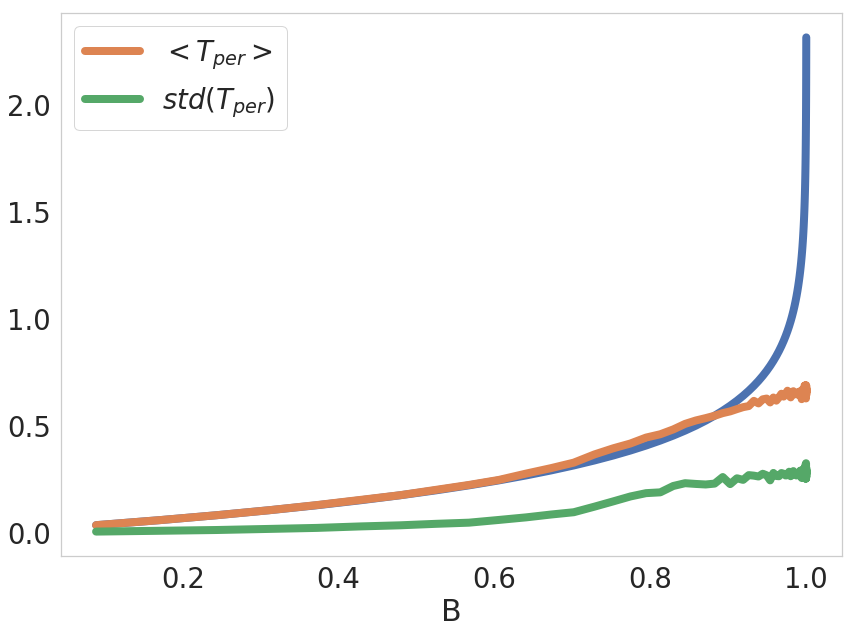

In [30]:
plt.plot(B_for_samples, T_theo_sampled)
plt.plot(B_for_samples, means_T, label=r'$<T_{per}>$')
plt.plot(B_for_samples, std_T, label=r'$std(T_{per})$')

plt.xlabel('B')
plt.legend()

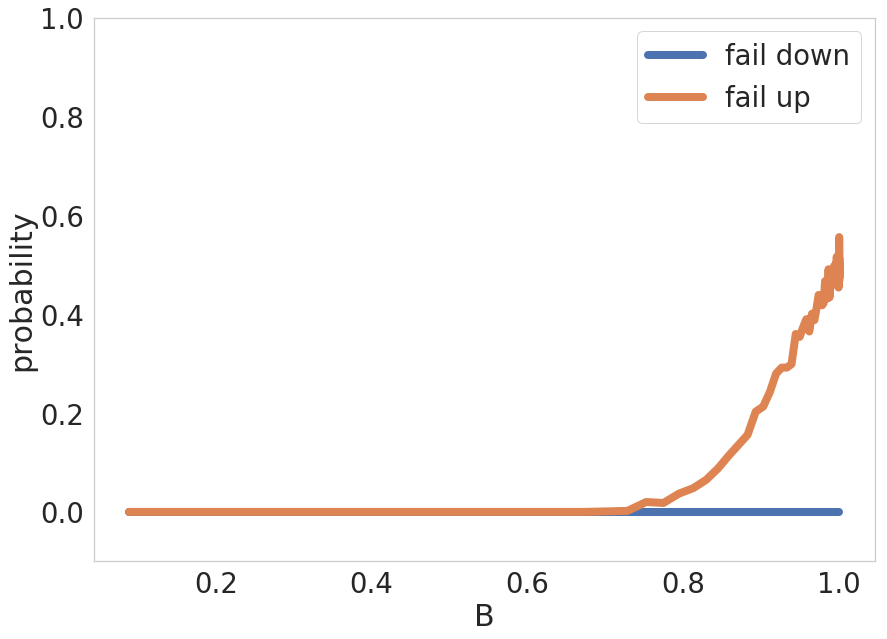

In [31]:
plt.plot(B_for_samples, fail_down_set, label='fail down')
plt.plot(B_for_samples, fail_up_set, label='fail up')

plt.xlabel('B')
plt.ylabel('probability')
plt.ylim([-0.1, 1.0])
plt.legend()

## Storage of the plot

#### With precision

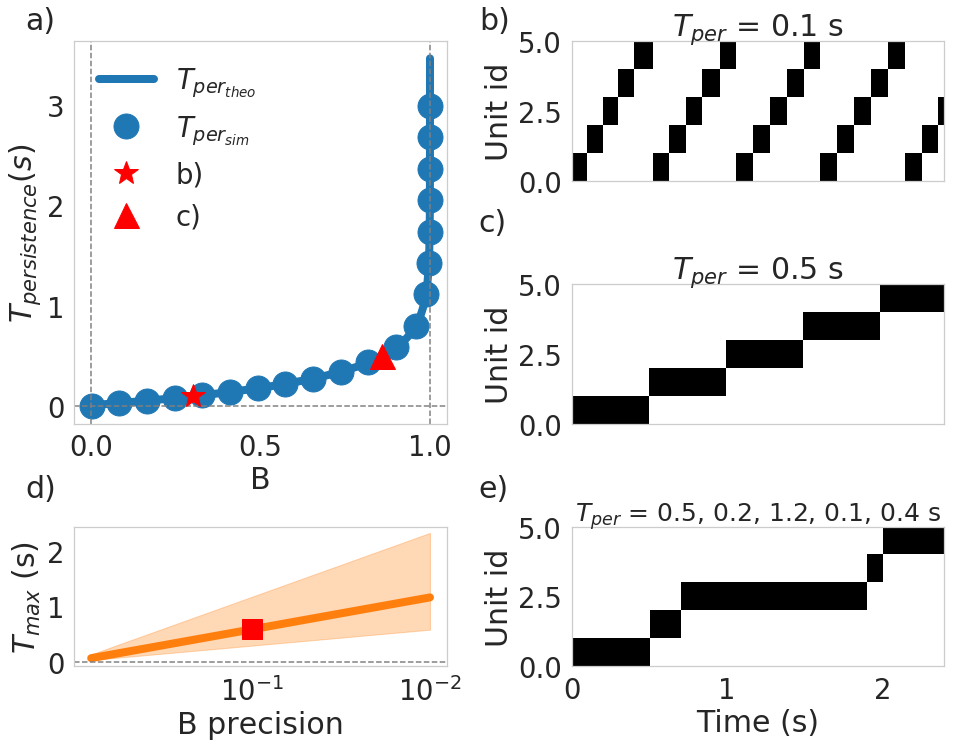

In [32]:
sns.set(font_scale=2.5)
sns.set_style("whitegrid", {'axes.grid': False})


lw = 8
ms = 15
save = True
captions = True
size = 10
show_units = True

fig = plt.figure()
gs = gridspec.GridSpec(3, 2)

# The scaling curve
ax = fig.add_subplot(gs[:2, 0])

ax.plot(B_theo, T, lw=lw, color=colors[0], label=r'$T_{per_{theo}}$');
ax.plot(B_sim, T_sim, 'o', color=colors[0], ms=ms + 10, label=r'$T_{per_{sim}}$')


ax.set_xlabel('B')
ax.set_ylabel(r'$T_{persistence} (s)$')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.axvline(1, ls='--', color='gray')

ax.plot(B1, 0.100, '*', color='red', ms=ms + 10, label='b)')
ax.plot(B2, 0.500, '^', color='red', ms=ms + 10, label='c)')

ax.legend(frameon=False, loc=2);


# First example
ax1 = fig.add_subplot(gs[0, 1])
extent = [0, T_saved, 0, minicolumns]
ax1.imshow(o1.T, cmap=cmap, origin='lower', aspect='auto', extent=extent)

ax1.set_ylabel('Unit id')
ax1.set_title(r'$T_{per}$ = ' + str(T_persistence1) + ' s')

fig.tight_layout()
ax1.xaxis.set_ticklabels([])


if not show_units:
    ax1.xaxis.set_ticklabels([])
    ax1.yaxis.set_ticklabels([])
    
# The second example
ax2 = fig.add_subplot(gs[1, 1])
extent = [0, T_saved, 0, minicolumns]
ax2.imshow(o2.T, cmap=cmap, origin='lower', aspect='auto', extent=extent)

ax2.set_ylabel('Unit id')
ax2.set_title(r'$T_{per}$ = ' + str(T_persistence2) + ' s')
ax2.xaxis.set_ticklabels([])

# Variable time
ax3 = fig.add_subplot(gs[2, 1])
extent = [0, T_saved, 0, minicolumns]
ax3.imshow(o3, cmap=cmap, origin='lower', aspect='auto', extent=extent)

ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Unit id')
aux_text = '0.5, 0.2, 1.2, 0.1, 0.4 s'
ax3.set_title(r'$T_{per}$ = ' + aux_text, fontsize=25)


if not show_units:
    ax2.xaxis.set_ticklabels([])
    ax2.yaxis.set_ticklabels([])

    
precision = np.logspace(-0.1, -2.0, num=35)
B_max = 1 - precision
B_max

T_range = tau_a * (np.log(1 / (1 - B_max)) + np.log(1 / (1 - r))) 
T_range_max = 2 * T_range 
T_range_min = 0.5 * T_range 
    
ax = fig.add_subplot(gs[2, 0])

ax.plot(precision, T_range, lw=lw, color=colors[1])
ax.fill_between(precision, T_range_min, T_range_max, color=colors[1] ,alpha=alpha_graph)
ax.set_xscale('log')
ax.set_xlabel('B precision')
ax.set_ylabel(r'$T_{max}$ (s)')
ax.invert_xaxis()

T1 = tau_a * (np.log(1 / (1 - 0.9)) + np.log(1 / (1 - r))) 
T2 = tau_a * (np.log(1 / (1 - 0.99)) + np.log(1 / (1 - r))) 
ax.plot(0.1, T1, 's', color='red', ms=ms + 5)
#ax.plot(0.01, T2, 'D', color='red', ms=ms + 5)


ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ylabels_points = [0, 1, 2]
ylocations = ylabels_points
ylabels_string = [f'{y}' for y in ylabels_points]
ax.yaxis.set_major_locator(plt.FixedLocator(ylocations))
ax.yaxis.set_major_formatter(plt.FixedFormatter(ylabels_string))



if captions:
    size = 30
    fig.text(0.05, 0.93, 'a)', size=size)
    fig.text(0.50, 0.93, 'b)', size=size)
    fig.text(0.50, 0.65, 'c)', size=size)
    fig.text(0.05, 0.28, 'd)', size=size)
    fig.text(0.50, 0.28, 'e)', size=size)

if save:
    directory = '../plot_producers/'
    file_name = 'persistent_times'
    format_string = '.pdf'
    string_to_save = directory + file_name + format_string
    fig.savefig(string_to_save, frameon=False, dpi=110, bbox_inches='tight')

#### No precision

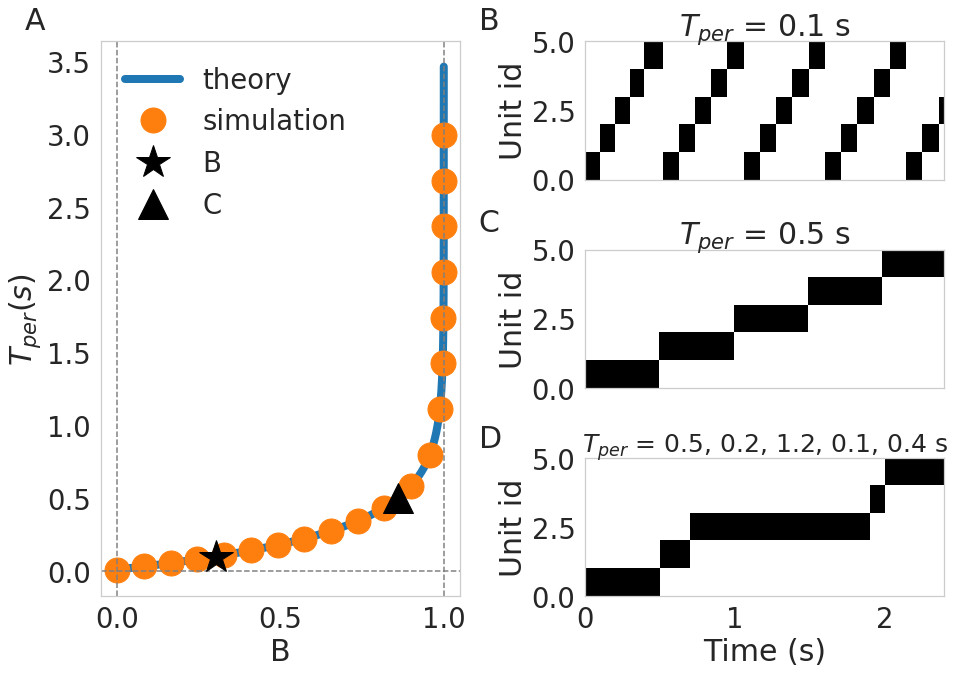

In [42]:
sns.set(font_scale=2.5)
sns.set_style("whitegrid", {'axes.grid': False})
cmap = matplotlib.cm.RdBu_r
color_red = cmap([0.01, 0.99])[1]
color_blue = cmap([0.01, 0.99])[0]
cmap = matplotlib.cm.binary

lw = 8
ms = 15
save = True
captions = True
size = 10
show_units = True

fig = plt.figure()
gs = gridspec.GridSpec(3, 2)

# The scaling curve
ax = fig.add_subplot(gs[:, 0])

ax.plot(B_theo, T, lw=lw, color=colors[0], label=r'theory');
ax.plot(B_sim, T_sim, 'o', color=colors[1], ms=ms + 10, label=r'simulation')


ax.set_xlabel('B')
ax.set_ylabel(r'$T_{per} (s)$')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.axvline(1, ls='--', color='gray')

ax.plot(B1, 0.100, '*', color='black', ms=ms + 20, label='B')
ax.plot(B2, 0.500, '^', color='black', ms=ms + 15, label='C')

ax.legend(frameon=False, loc=2);


# First example
ax1 = fig.add_subplot(gs[0, 1])
extent = [0, T_saved, 0, minicolumns]
ax1.imshow(o1.T, cmap=cmap, origin='lower', aspect='auto', extent=extent)

ax1.set_ylabel('Unit id')
ax1.set_title(r'$T_{per}$ = ' + str(T_persistence1) + ' s')

fig.tight_layout()
ax1.xaxis.set_ticklabels([])


if not show_units:
    ax1.xaxis.set_ticklabels([])
    ax1.yaxis.set_ticklabels([])
    
# The second example
ax2 = fig.add_subplot(gs[1, 1])
extent = [0, T_saved, 0, minicolumns]
ax2.imshow(o2.T, cmap=cmap, origin='lower', aspect='auto', extent=extent)

ax2.set_ylabel('Unit id')
ax2.set_title(r'$T_{per}$ = ' + str(T_persistence2) + ' s')
ax2.xaxis.set_ticklabels([])

# Variable time
ax3 = fig.add_subplot(gs[2, 1])
extent = [0, T_saved, 0, minicolumns]
ax3.imshow(o3, cmap=cmap, origin='lower', aspect='auto', extent=extent)

ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Unit id')
aux_text = '0.5, 0.2, 1.2, 0.1, 0.4 s'
ax3.set_title(r'$T_{per}$ = ' + aux_text, fontsize=25)


if not show_units:
    ax2.xaxis.set_ticklabels([])
    ax2.yaxis.set_ticklabels([])


if captions:
    size = 30
    fig.text(0.05, 0.93, 'A', size=size)
    fig.text(0.50, 0.93, 'B', size=size)
    fig.text(0.50, 0.65, 'C', size=size)
    fig.text(0.50, 0.35, 'D', size=size)

if save:
    directory = '../plot_producers/'
    file_name = 'persistent_times'
    format_string = '.pdf'
    string_to_save = directory + file_name + format_string
    fig.savefig(string_to_save, frameon=False, dpi=110, bbox_inches='tight')

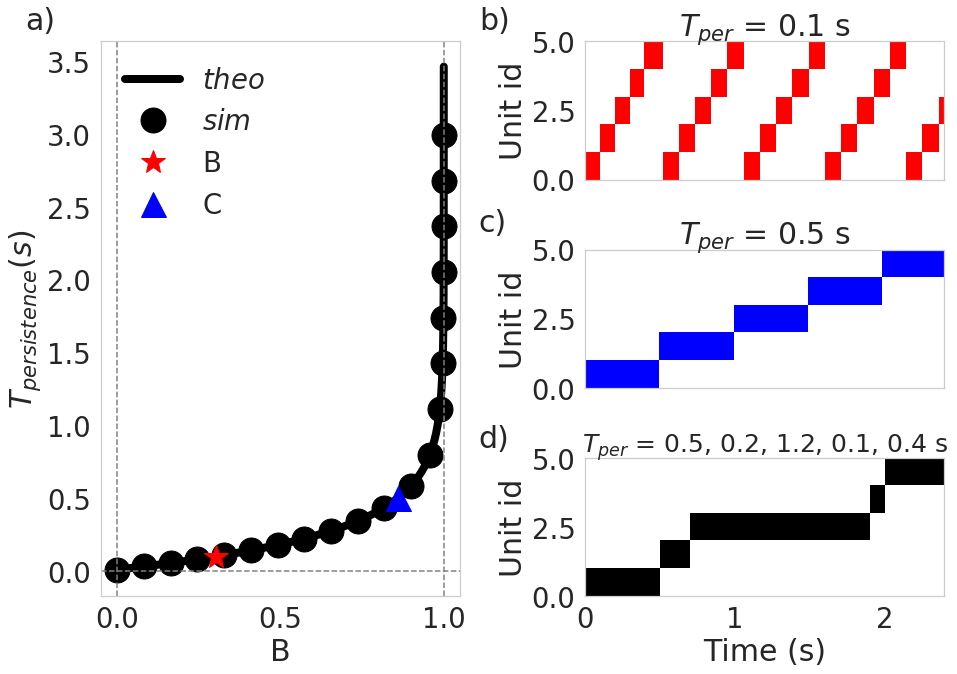

In [34]:
sns.set(font_scale=2.5)
sns.set_style("whitegrid", {'axes.grid': False})


lw = 8
ms = 15
save = True
captions = True
size = 10
show_units = True

fig = plt.figure()
gs = gridspec.GridSpec(3, 2)

# The scaling curve
ax = fig.add_subplot(gs[:, 0])

ax.plot(B_theo, T, color='black', lw=lw, label=r'$theo$');
ax.plot(B_sim, T_sim, 'o', color='black' , ms=ms + 10, label=r'$sim$')


ax.set_xlabel('B')
ax.set_ylabel(r'$T_{persistence} (s)$')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.axvline(1, ls='--', color='gray')

ax.plot(B1, 0.100, '*', color='red', ms=ms + 10, label='B')
ax.plot(B2, 0.500, '^', color='blue', ms=ms + 10, label='C')

ax.legend(frameon=False, loc=2);


# First example
ax1 = fig.add_subplot(gs[0, 1])
cmap1 = matplotlib.cm.Reds
cmap1.set_under(color='white')
cmap1.set_over(color='red')

extent = [0, T_saved, 0, minicolumns]
ax1.imshow(o1.T, cmap=cmap1, origin='lower', aspect='auto', extent=extent, vmin=0.1, vmax=0.5)

ax1.set_ylabel('Unit id')
ax1.set_title(r'$T_{per}$ = ' + str(T_persistence1) + ' s')

fig.tight_layout()
ax1.xaxis.set_ticklabels([])


if not show_units:
    ax1.xaxis.set_ticklabels([])
    ax1.yaxis.set_ticklabels([])
    
# The second example
ax2 = fig.add_subplot(gs[1, 1])
cmap2 = matplotlib.cm.Blues
cmap2.set_under(color='white')
cmap2.set_over(color='blue')

extent = [0, T_saved, 0, minicolumns]
ax2.imshow(o2.T, cmap=cmap2, origin='lower', aspect='auto', extent=extent, vmin=0.1, vmax=0.5)

ax2.set_ylabel('Unit id')
ax2.set_title(r'$T_{per}$ = ' + str(T_persistence2) + ' s')
ax2.xaxis.set_ticklabels([])

# Variable time
ax3 = fig.add_subplot(gs[2, 1])
extent = [0, T_saved, 0, minicolumns]
ax3.imshow(o3, cmap=cmap, origin='lower', aspect='auto', extent=extent)

ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Unit id')
aux_text = '0.5, 0.2, 1.2, 0.1, 0.4 s'
ax3.set_title(r'$T_{per}$ = ' + aux_text, fontsize=25)


if not show_units:
    ax2.xaxis.set_ticklabels([])
    ax2.yaxis.set_ticklabels([])



if captions:
    size = 30
    fig.text(0.05, 0.93, 'a)', size=size)
    fig.text(0.50, 0.93, 'b)', size=size)
    fig.text(0.50, 0.65, 'c)', size=size)
    fig.text(0.50, 0.35, 'd)', size=size)

if save:
    directory = '../plot_producers/'
    file_name = 'persistent_times'
    format_string = '.pdf'
    string_to_save = directory + file_name + format_string
    fig.savefig(string_to_save, frameon=False, dpi=110, bbox_inches='tight')

In [35]:
precision = np.logspace(-0.3, -3.0, num=15)
B_max = 1 - precision
B_max

T_range = tau_a * (np.log(1 / (1 - B_max)) + np.log(1 / (1 - r))) - tau_s
T_range_max = 2 * T_range
T_range_min = 0.5 * T_range

No handles with labels found to put in legend.


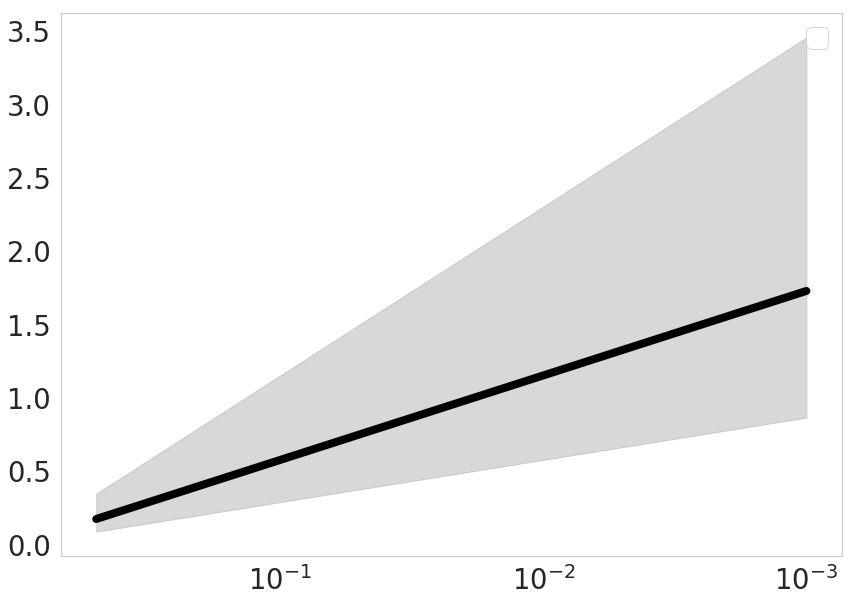

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(precision, T_range, lw=lw, color='black')
ax.fill_between(precision, T_range_min, T_range_max, color='gray',alpha=alpha_graph)
ax.set_xscale('log')
ax.invert_xaxis()

ax.legend();

In [37]:
precision

array([0.50119, 0.32147, 0.2062 , 0.13226, 0.08483, 0.05441, 0.0349 ,
       0.02239, 0.01436, 0.00921, 0.00591, 0.00379, 0.00243, 0.00156,
       0.001  ])